# **Menu Analytics Sentiment Analysis of Restaurant Reviews using NLP and LSTM**

**Deep Learning Project**

**Problem Statement:** Menu Analytics Sentiment Analysis of Restaurant Reviews using NLP and LSTM

**Group Members:**

<table>
  <tr>
    <th>Roll No.</th>
    <th>Name</th>
    <th>PRN</th>
    <th>Seat No.</th>
  </tr>
  <tr>
    <td>253</td>
    <td>KSHITIJA LADE</td>
    <td>0120190090</td>
    <td>B224013</td>
  </tr>
  <tr>
    <td>258</td>
    <td>VAISHNAVI JADHAV</td>
    <td>0120190202</td>
    <td>B224045</td>
  </tr>
  <tr>
    <td>334</td>
    <td>SUMIT MAHAJAN</td>
    <td>0120190312</td>
    <td>B228035</td>
  </tr>
  <tr>
    <td>335</td>
    <td>LALIT RAJPUT</td>
    <td>0120190299</td>
    <td>B228034</td>
  </tr>
</table>



**Description:** Menu Analytics can review your menu options and provide guidance to help you reach your goals, be it adding new items that appeal to health-conscious customers, options for those with special diets, or optimizing financial performance through sales mix and margin management. Sentiment Analysis of restaurant reviews can help with menu.


**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve
from wordcloud import WordCloud
import pandas as pd
import string
import sklearn.metrics as metrics

# Libraries for Text Preprocessing
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textblob
from textblob import Word
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Libraries for Visualization
import wordcloud
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Dataset**

In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/review_description_sentiment.csv", encoding='cp1252')
df = df[["Description", "Sentiment"]]
df

,Description,Sentiment
0,NaN,NaN
1,What is momos without chutney?,0.0
2,NaN,NaN
3,good,1.0
4,NaN,NaN
...,...,...
88459,they didn't send chutney n mayonnaise and gree...,NaN
88460,NaN,NaN
88461,Tasty,NaN
88462,NaN,NaN


**Statistical summary and descriptive statistics of dataset**

In [5]:
df.head(10) #returns the first 10 rows of the dataset

,Description,Sentiment
0,NaN,NaN
1,What is momos without chutney?,0.0
2,NaN,NaN
3,good,1.0
4,NaN,NaN
5,pls stop do this and warning for this out let.,0.0
6,NaN,NaN
7,the delivery was delayed . the momos are not p...,0.0
8,NaN,NaN
9,Delivery was good,1.0


In [6]:
df.tail(10) #returns the last 10 rows of the dataset

,Description,Sentiment
88454,NaN,NaN
88455,soggy and cold food,NaN
88456,NaN,NaN
88457,"Dough was little sour , couldn't able to enjoy it",NaN
88458,NaN,NaN
88459,they didn't send chutney n mayonnaise and gree...,NaN
88460,NaN,NaN
88461,Tasty,NaN
88462,NaN,NaN
88463,NaN,NaN


In [7]:
df.shape #returns the dimensions of the dataframe

(88464, 2)

In [8]:
df.describe() #returns count, mean, std, etc for each column

,Sentiment
count,2312.000000
mean,0.202855
std,0.402212
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88464 entries, 0 to 88463
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  44225 non-null  object 
 1   Sentiment    2312 non-null   float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df.isnull().sum()

Description    44239
Sentiment      86152
dtype: int64

In [11]:
df.Sentiment.unique()

array([nan,  0.,  1.])

**Dataset Pre-Processing**

In [12]:
df=df.dropna()

In [13]:
df

,Description,Sentiment
1,What is momos without chutney?,0.0
3,good,1.0
5,pls stop do this and warning for this out let.,0.0
7,the delivery was delayed . the momos are not p...,0.0
9,Delivery was good,1.0
...,...,...
5043,restaurants no.is invalid,0.0
5045,chicken was not fresh,0.0
5047,restaurants no.is invalid,0.0
5049,good,1.0


In [14]:
df['Sentiment'] = df['Sentiment'].astype(int)
df['Sentiment']=(df['Sentiment']+1)%2
df = df.reset_index(drop=True)
df

<ipython-input-14-0e91e3a2c1ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-0e91e3a2c1ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Description,Sentiment
0,What is momos without chutney?,1
1,good,0
2,pls stop do this and warning for this out let.,1
3,the delivery was delayed . the momos are not p...,1
4,Delivery was good,0
...,...,...
2307,restaurants no.is invalid,1
2308,chicken was not fresh,1
2309,restaurants no.is invalid,1
2310,good,0


**Data Exploration and Visualisation**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



1    1843
0     469
Name: Sentiment, dtype: int64

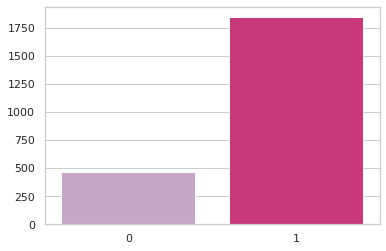

In [15]:
count_values = df['Sentiment'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values, palette='PuRd')
count_values

In [16]:
df['length'] = df['Description'].apply(len) # number of characters
df['length'].describe() # info()

count    2312.000000
mean       59.934689
std        61.515953
min         1.000000
25%        22.000000
50%        44.000000
75%        78.000000
max      1033.000000
Name: length, dtype: float64

In [17]:
df.head(10)

,Description,Sentiment,length
0,What is momos without chutney?,1,30
1,good,0,4
2,pls stop do this and warning for this out let.,1,46
3,the delivery was delayed . the momos are not p...,1,92
4,Delivery was good,0,17
5,"I have got wrong item, delived non veg. I want...",1,53
6,I have order 3 pepsi but only got 2...very bad,1,46
7,not cooked properly. raw smell of chicken,1,41
8,no doubt . absolutely fine,0,26
9,no tissues or spoons neither chutney . horribl...,1,58


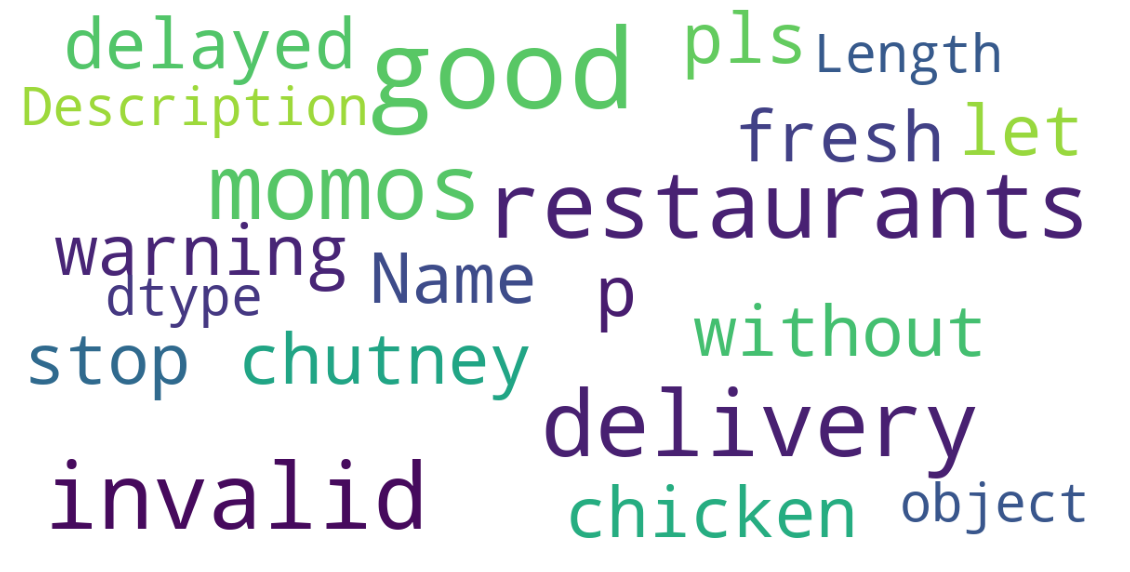

In [18]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Description"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



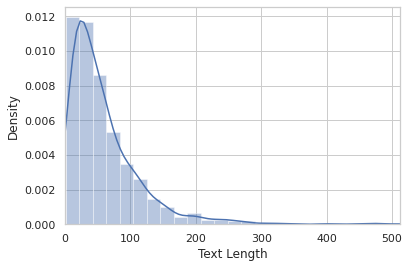

In [19]:
sns.distplot(df['length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

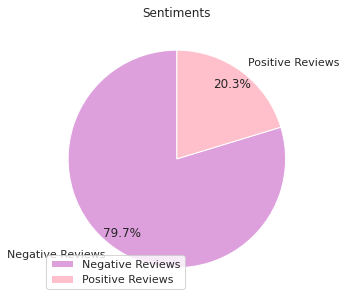

In [20]:
colors = ['plum', 'pink', 'peachpuff','paleturquoise','thistle','lightsteelblue']
# explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
sentiments = ['Negative Reviews', 'Positive Reviews']
plt.pie(df['Sentiment'].value_counts(), colors=colors, labels=sentiments, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.legend()
plt.title("Sentiments")
plt.show()

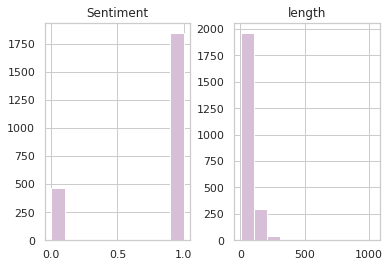

In [21]:
df.hist(color='thistle') #to draw histogram
plt.show()

**Text Proprocessing**

Decontracted
Data cleaning
Spell check
Stop Words Removal
Tokenization
POS Tagging
Stemming
Lemmatization


**Decontraction:** Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Decontracting the contracted words.

**DataCleaning:** Removing html, xml tags, punctautions, urls, etc.

In [22]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def decontracted(phrase):
    # specific
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    # general
    phrase = re.sub(r"n\ t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase)  
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase)
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)
    
    return phrase

    
def clean_text(df):
    
    cleaned_review = []

    for review_text in tqdm(df['Description']):
        
        # expand the contracted words
        review_text = decontracted(review_text)
        #remove html tags
        review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #remove url 
        review_text = re.sub(r'https?://\S+|www\.\S+', '', review_text)
        
        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        review_text = review_text.translate(str.maketrans('', '', string.punctuation))
        # ''.join([char for char in movie_text_data if char not in string.punctuation])
        
        # remove emails
        review_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', review_text)
    
        cleaned_review.append(review_text)

    return cleaned_review  

df['Cleaned_Text'] = clean_text(df)
df.head(10)  

100%|██████████| 2312/2312 [00:00<00:00, 3540.96it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,What is momos without chutney
1,good,0,4,good
2,pls stop do this and warning for this out let.,1,46,pls stop do this and warning for this out let
3,the delivery was delayed . the momos are not p...,1,92,the delivery was delayed the momos are not p...
4,Delivery was good,0,17,Delivery was good
5,"I have got wrong item, delived non veg. I want...",1,53,I have got wrong item delived non veg I want...
6,I have order 3 pepsi but only got 2...very bad,1,46,I have order pepsi but only got very bad
7,not cooked properly. raw smell of chicken,1,41,not cooked properly raw smell of chicken
8,no doubt . absolutely fine,0,26,no doubt absolutely fine
9,no tissues or spoons neither chutney . horribl...,1,58,no tissues or spoons neither chutney horribl...


**Tokenization:** Splitting sentences into words(tokens).

In [23]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

def tokenize(phrase):
    tokens_list = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    
    for review_text in tqdm(phrase):
        tokens1 = word_tokenize(review_text)
        tokens1 = [word for word in tokens1]
        tokens_list.append(tokens1)
    return tokens_list

df2 = df.reset_index(drop=True)
df2['length'] = df['Description'].apply(len) # number of characters
df2['length'].describe() # info()
df2['Cleaned_Text'] = tokenize(df['Cleaned_Text'])
token_list = tokenize(df['Cleaned_Text'])
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|██████████| 2312/2312 [00:00<00:00, 8837.36it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,"[What, is, momos, without, chutney]"
1,good,0,4,[good]
2,pls stop do this and warning for this out let.,1,46,"[pls, stop, do, this, and, warning, for, this,..."
3,the delivery was delayed . the momos are not p...,1,92,"[the, delivery, was, delayed, the, momos, are,..."
4,Delivery was good,0,17,"[Delivery, was, good]"


**Remove Stopwords:** Words like a,am,the,is,and,or, etc. will be removed.

In [24]:
def remove_stopwords(phrase):
    remove_sw = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    stop_words = stopwords.words('english')
    
    for review_text in tqdm(phrase):
        tokens = word_tokenize(review_text)
        tokens = [word for word in tokens if not word in stop_words]
        remove_sw.append(tokens)
    return remove_sw

df['Cleaned_Text'] = remove_stopwords(df['Cleaned_Text'])
df.head()

100%|██████████| 2312/2312 [00:00<00:00, 6181.51it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,"[What, momos, without, chutney]"
1,good,0,4,[good]
2,pls stop do this and warning for this out let.,1,46,"[pls, stop, warning, let]"
3,the delivery was delayed . the momos are not p...,1,92,"[delivery, delayed, momos, prepared, properly,..."
4,Delivery was good,0,17,"[Delivery, good]"


**POS Tagging:** Identify the Part of Speech of each tokens

In [25]:
def Pos_tagging(phrase):
    postags = []
    for i in range(len(df['Cleaned_Text'])):
        pos_tagger = nltk.pos_tag(token_list[i])
        postags.append(pos_tagger)
        return postags

df3 = df.reset_index(drop=True)
df3['length'] = df['Description'].apply(len) # number of characters
df3['length'].describe() # info()
res = Pos_tagging(df['Cleaned_Text'])
res

[[('What', 'WP'),
  ('is', 'VBZ'),
  ('momos', 'VBN'),
  ('without', 'IN'),
  ('chutney', 'NN')]]

Now we have the POS tags for every text. There are lots of categories. Here are the meanings:

NN: noun (there are other categories that can fit within this one for our purposes, such as NNS, NNP, NNPS, which all belong to nouns, containing plurals and proper names)

RB: adverb

VB: verb (and similar categories indicating tense: VBP, VBG, VBS..)

JJ: adjective or numeral

**Stemming:** Extrating root word by removing the suffixes and prefixes

In [26]:
from nltk.stem import PorterStemmer

def stemming(phrase):
    stemmer = PorterStemmer()
    stem_output=[]
    stemmed=[]
    for review_text in tqdm(phrase):
        stemmed = [stemmer.stem(word) for word in review_text]
        stem_output.append(stemmed)
    return stem_output

df1 = df.reset_index(drop=True)
df1['length'] = df['Description'].apply(len) # number of characters
df1['length'].describe() # info()
df1['Cleaned_Text'] = stemming(df['Cleaned_Text'])
df1.head()

100%|██████████| 2312/2312 [00:00<00:00, 6393.91it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,"[what, momo, without, chutney]"
1,good,0,4,[good]
2,pls stop do this and warning for this out let.,1,46,"[pl, stop, warn, let]"
3,the delivery was delayed . the momos are not p...,1,92,"[deliveri, delay, momo, prepar, properli, enti..."
4,Delivery was good,0,17,"[deliveri, good]"


**Lemmatization:** Extracting root word by refering the dictionary of words.

In [27]:
def lemmatizing(phrase):
    lemmatizer = WordNetLemmatizer()
    lemmated_output=[]
    lemmated=[]
    for review_text in tqdm(phrase):
        lemmated = [lemmatizer.lemmatize(word) for word in review_text]
        lemmated_output.append(lemmated)
    return lemmated_output

df['Cleaned_Text'] = lemmatizing(df['Cleaned_Text'])
df.head()

100%|██████████| 2312/2312 [00:02<00:00, 1061.79it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,"[What, momos, without, chutney]"
1,good,0,4,[good]
2,pls stop do this and warning for this out let.,1,46,"[pls, stop, warning, let]"
3,the delivery was delayed . the momos are not p...,1,92,"[delivery, delayed, momos, prepared, properly,..."
4,Delivery was good,0,17,"[Delivery, good]"


In [28]:
def to_sentence(phrase):
    sentence=[]
    for words in tqdm(phrase):
        sentence.append((" ").join(words))
    return sentence
df['Cleaned_Text']=to_sentence(df['Cleaned_Text'])
df.head()

100%|██████████| 2312/2312 [00:00<00:00, 638311.67it/s]


,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,What momos without chutney
1,good,0,4,good
2,pls stop do this and warning for this out let.,1,46,pls stop warning let
3,the delivery was delayed . the momos are not p...,1,92,delivery delayed momos prepared properly entir...
4,Delivery was good,0,17,Delivery good


In [29]:
df

,Description,Sentiment,length,Cleaned_Text
0,What is momos without chutney?,1,30,What momos without chutney
1,good,0,4,good
2,pls stop do this and warning for this out let.,1,46,pls stop warning let
3,the delivery was delayed . the momos are not p...,1,92,delivery delayed momos prepared properly entir...
4,Delivery was good,0,17,Delivery good
...,...,...,...,...
2307,restaurants no.is invalid,1,25,restaurant invalid
2308,chicken was not fresh,1,21,chicken fresh
2309,restaurants no.is invalid,1,25,restaurant invalid
2310,good,0,4,good


**Vector Generation**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1),tokenizer = token.tokenize)
x = vectorizer.fit_transform(df.Cleaned_Text)
y = df.Sentiment.values

print("X.shape : ",x.shape)
print("y.shape : ",y.shape)

train_idx, test_idx = train_test_split(np.arange(df.shape[0]), test_size=0.3,shuffle=True, random_state=42)

x_train = x[train_idx]
y_train = y[train_idx]

x_test = x[test_idx]
y_test = y[test_idx]
print("Number of training examples:{}".format(len(train_idx)))
print("Number of testing examples:{}\n".format(len(test_idx)))
print("Training data: X_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Testing data: X_test : {}, y_test : {}".format(x_test.shape, y_test.shape))

X.shape :  (2312, 578)
y.shape :  (2312,)
Number of training examples:1618
Number of testing examples:694

Training data: X_train : (1618, 578), y_train : (1618,)
Testing data: X_test : (694, 578), y_test : (694,)


**Logistic Regression:** Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       153
           1       0.93      0.97      0.95       541

    accuracy                           0.93       694
   macro avg       0.91      0.86      0.88       694
weighted avg       0.92      0.93      0.92       694


Accuracy for Logistic Regression Model is: 0.9250720461095101




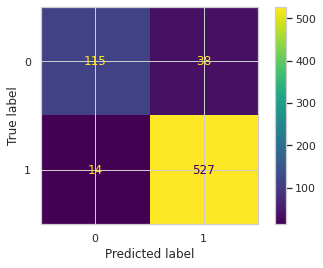

In [31]:
from sklearn import linear_model
lr_clf =  linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')#LogisticRegression()

lr_clf.fit(x_train, y_train)

y_pred_test_lr = lr_clf.predict(x_test)
y_predprob_lr = lr_clf.predict_proba(x_test)
matrix_lr = confusion_matrix(y_test,y_pred_test_lr, )
print(classification_report(y_test, y_pred_test_lr))
print("\nAccuracy for Logistic Regression Model is:",metrics.accuracy_score(y_test, y_pred_test_lr))
print("\n")

y_predict = lr_clf.predict(x_test)
acc_lr = metrics.accuracy_score(y_test, y_pred_test_lr)
matrix_display = ConfusionMatrixDisplay(matrix_lr).plot()

In [32]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [33]:
print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 95.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.952206     0.957652  0.956737     0.954929      0.956589
recall       0.819620     0.990015  0.956737     0.904818      0.956737
f1-score     0.880952     0.973565  0.956737     0.927259      0.955477
support    316.000000  1302.000000  0.956737  1618.000000   1618.000000
_______________________________________________
Confusion Matrix: 
 [[ 259   57]
 [  13 1289]]

Test Result:
Accuracy Score: 92.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.891473    0.932743  0.925072    0.912108      0.923645
recall       0.751634    0.974122  0.925072    0.862878      0.925072
f1-score     0.815603    0.952984  0.925072    0.884293      0.922697
support    153.000000  541.000000  0.925072  694.

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       153
           1       0.96      0.89      0.92       541

    accuracy                           0.88       694
   macro avg       0.82      0.88      0.85       694
weighted avg       0.90      0.88      0.89       694


Accuracy for Decision Tree Model is: 0.8847262247838616




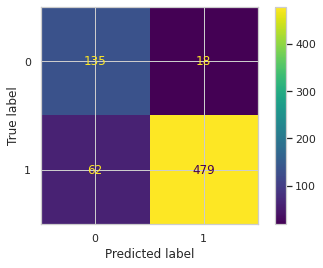

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(x_train, y_train)

y_pred_test_dt = clf_DT.predict(x_test)
matrix_dt = confusion_matrix(y_test,y_pred_test_dt)
print(classification_report(y_test, y_pred_test_dt))
print("\nAccuracy for Decision Tree Model is:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("\n")
acc_dt = metrics.accuracy_score(y_test, y_pred_test_dt)
matrix_display = ConfusionMatrixDisplay(matrix_dt).plot()

In [35]:
print_score(clf_DT, x_train, y_train, x_test, y_test, train=True)
print_score(clf_DT, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.926254     0.998436  0.983313     0.962345      0.984339
recall       0.993671     0.980799  0.983313     0.987235      0.983313
f1-score     0.958779     0.989539  0.983313     0.974159      0.983531
support    316.000000  1302.000000  0.983313  1618.000000   1618.000000
_______________________________________________
Confusion Matrix: 
 [[ 314    2]
 [  25 1277]]

Test Result:
Accuracy Score: 88.47%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.685279    0.963783  0.884726    0.824531      0.902384
recall       0.882353    0.885397  0.884726    0.883875      0.884726
f1-score     0.771429    0.922929  0.884726    0.847179      0.889529
support    153.000000  541.000000  0.884726  694.

**Randon Forest:** Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       153
           1       0.97      0.93      0.95       541

    accuracy                           0.93       694
   macro avg       0.88      0.92      0.90       694
weighted avg       0.93      0.93      0.93       694


Accuracy for Random Forest Model is: 0.8847262247838616




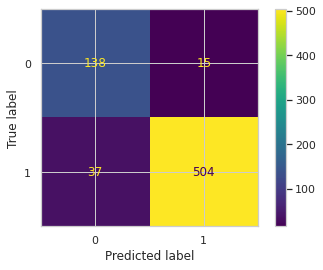

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=200)
clf_RF.fit(x_train, y_train)

y_pred_test_re = clf_RF.predict(x_test)
matrix_re = confusion_matrix(y_test,y_pred_test_re)
print(classification_report(y_test, y_pred_test_re))
print("\nAccuracy for Random Forest Model is:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("\n")
acc_rf = metrics.accuracy_score(y_test, y_pred_test_re)
matrix_display = ConfusionMatrixDisplay(matrix_re).plot()

In [37]:
print_score(clf_RF, x_train, y_train, x_test, y_test, train=True)
print_score(clf_RF, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.931343     0.996882  0.983313     0.964113      0.984082
recall       0.987342     0.982335  0.983313     0.984838      0.983313
f1-score     0.958525     0.989555  0.983313     0.974040      0.983495
support    316.000000  1302.000000  0.983313  1618.000000   1618.000000
_______________________________________________
Confusion Matrix: 
 [[ 312    4]
 [  23 1279]]

Test Result:
Accuracy Score: 92.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.788571    0.971098  0.925072    0.879835      0.930858
recall       0.901961    0.931608  0.925072    0.916784      0.925072
f1-score     0.841463    0.950943  0.925072    0.896203      0.926807
support    153.000000  541.000000  0.925072  694.

**Support Vector Machine:** Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       153
           1       0.95      0.96      0.96       541

    accuracy                           0.93       694
   macro avg       0.90      0.89      0.90       694
weighted avg       0.93      0.93      0.93       694


Accuracy for Support Vector Machine Model is: 0.9293948126801153




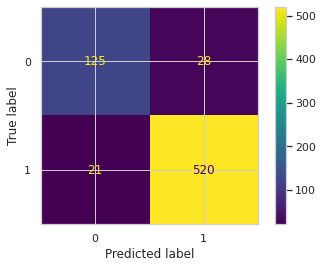

In [38]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(loss='hinge', dual=True)

model_svc.fit(x_train, y_train)
y_pred_test_sv = model_svc.predict(x_test)
matrix_sv = confusion_matrix(y_test,y_pred_test_sv)
print(classification_report(y_test, y_pred_test_sv))
print("\nAccuracy for Support Vector Machine Model is:",metrics.accuracy_score(y_test, y_pred_test_sv))
print("\n")
acc_svm = metrics.accuracy_score(y_test, y_pred_test_sv)
matrix_display = ConfusionMatrixDisplay(matrix_sv).plot()

In [39]:
print_score(model_svc, x_train, y_train, x_test, y_test, train=True)
print_score(model_svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 96.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.948276     0.969127  0.965389     0.958701      0.965054
recall       0.870253     0.988479  0.965389     0.929366      0.965389
f1-score     0.907591     0.978707  0.965389     0.943149      0.964818
support    316.000000  1302.000000  0.965389  1618.000000   1618.000000
_______________________________________________
Confusion Matrix: 
 [[ 275   41]
 [  15 1287]]

Test Result:
Accuracy Score: 92.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.856164    0.948905  0.929395    0.902535      0.928459
recall       0.816993    0.961183  0.929395    0.889088      0.929395
f1-score     0.836120    0.955005  0.929395    0.895562      0.928795
support    153.000000  541.000000  0.929395  694.

**Hyperparameter Tuning using GridSearchCV for Logistic Regression**

In [40]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv = GridSearchCV(lr_clf,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print('best paremeters for logistic regression: ', logreg_cv.best_params_)
print('best score for logistic regression after grid search cv:', logreg_cv.best_score_)
acc_logreg = logreg_cv.best_score_

best paremeters for logistic regression:  {'C': 1.0, 'penalty': 'l2'}
best score for logistic regression after grid search cv: 0.9277164327888967


In [41]:
inp = 'Y'
while(inp != 'N'):
    ip = input('\nEnter a Text: ')
    test_result = logreg_cv.predict(vectorizer.transform([ip]))
    if(test_result[0] == 0):
        print("\nSentiment: Positive Reviews")
    if(test_result[0] == 1):
        print("\nSentiment: Negative Reviews")
    inp = input("\nDo you want to continue? (Y/N): ")


Enter a Text: good taste

Sentiment: Positive Reviews

Do you want to continue? (Y/N): Y

Enter a Text: soggy and thick crust

Sentiment: Negative Reviews

Do you want to continue? (Y/N): N


**Model Evaluation**

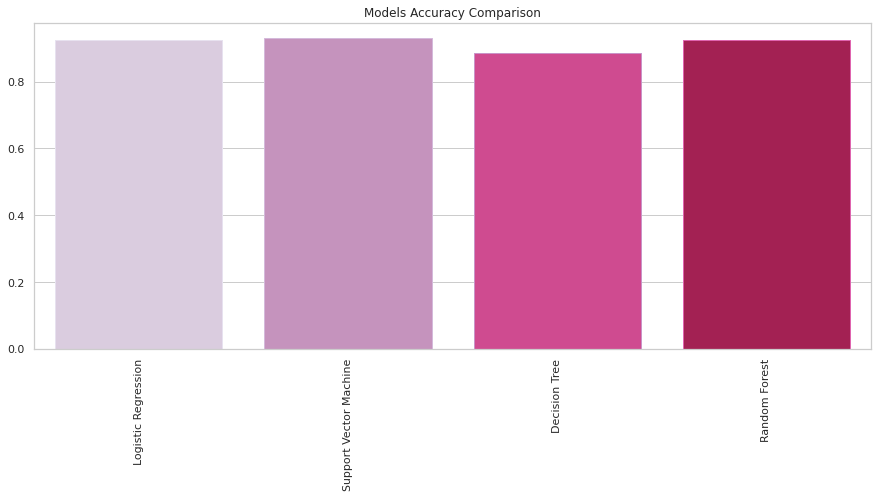

In [42]:
MLA_Name = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree','Random Forest']
MLA_Train_Accuracy = [acc_lr, acc_svm, acc_dt, acc_rf]
plt.subplots(figsize=(15,6))
sns.barplot(x=MLA_Name, y=MLA_Train_Accuracy,palette='PuRd',edgecolor=sns.color_palette('PuRd',7))
plt.xticks(rotation=90)
plt.title('Models Accuracy Comparison')
plt.show()

**LSTM:**
LSTM networks were designed specifically to overcome the long-term dependency problem faced by recurrent neural networks RNNs (due to the vanishing gradient problem). LSTMs have feedback connections which make them different to more traditional feedforward neural networks. This property enables LSTMs to process entire sequences of data (e.g. time series) without treating each point in the sequence independently, but rather, retaining useful information about previous data in the sequence to help with the processing of new data points. As a result, LSTMs are particularly good at processing sequences of data such as text, speech and general time-series.

In [43]:
tokenizer = Tokenizer(num_words=600,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

In [44]:
tokenizer.fit_on_texts(df["Cleaned_Text"])

In [45]:
X = tokenizer.texts_to_sequences(df["Cleaned_Text"])

In [46]:
X = pad_sequences(X,maxlen=100)

In [47]:
X[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
       244,   6, 169, 204,  53,  67, 246,  70,  44], dtype=int32)

In [48]:
y = df["Sentiment"]

In [49]:
vocab_size = len(tokenizer.word_index) + 1

In [50]:
vocab_size

2086

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

In [52]:
embedding_vector_features=40
model_1=Sequential()
model_1.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_1.add(LSTM(100))
model_1.add(Dense(1,activation='sigmoid'))

In [53]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           83440     
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 139,941
Trainable params: 139,941
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
history=model_1.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test), )

Epoch 1/20
51/51 [==============================] - 8s 116ms/step - loss: 0.5331 - accuracy: 0.7967 - val_loss: 0.4683 - val_accuracy: 0.7968
Epoch 2/20
51/51 [==============================] - 5s 99ms/step - loss: 0.3742 - accuracy: 0.8208 - val_loss: 0.2479 - val_accuracy: 0.9323
Epoch 3/20
51/51 [==============================] - 5s 100ms/step - loss: 0.2017 - accuracy: 0.9326 - val_loss: 0.1771 - val_accuracy: 0.9452
Epoch 4/20
51/51 [==============================] - 5s 99ms/step - loss: 0.1425 - accuracy: 0.9481 - val_loss: 0.1654 - val_accuracy: 0.9424
Epoch 5/20
51/51 [==============================] - 5s 99ms/step - loss: 0.1136 - accuracy: 0.9611 - val_loss: 0.1734 - val_accuracy: 0.9409
Epoch 6/20
51/51 [==============================] - 5s 97ms/step - loss: 0.1210 - accuracy: 0.9623 - val_loss: 0.1559 - val_accuracy: 0.9510
Epoch 7/20
51/51 [==============================] - 5s 101ms/step - loss: 0.0905 - accuracy: 0.9685 - val_loss: 0.1772 - val_accuracy: 0.9467
Epoch 8/20

As training loss decreases validation loss increasing , it means over model overfitting. we know that our dataset is imbalanced if we train a neural network on imbalanced data set it baised towards major class.

To overcome this problem we can use Dropout rate while training , Dropout rate is a regularization technique in neural networks.

Evaluating the trained model with new data.

In [55]:
scores_lstm = model_1.predict(X_test, verbose=1, batch_size=1024)

1/1 [==============================] - 1s 1s/step


In [56]:
y_pred_lstm=np.where(scores_lstm>0.5,1,0)

In [57]:
acc_lstm = accuracy_score(y_pred_lstm,Y_test)
print(acc_lstm*100)

93.51585014409221


In [58]:
# New review
string1 = 'good taste of pizza'

# Evaluating trained mode with new review
x_1=tokenizer.texts_to_sequences([string1])
x_1 = pad_sequences(x_1,maxlen=100)
model_1.predict(x_1)

1/1 [==============================] - 0s 25ms/step


array([[0.05373397]], dtype=float32)

Here, the output value near to the 0 , given review is positive , model prediction also positive so our trained model working well on new data but we can not conclude it’s generalized model. We need to do lot of hypreparameter optimization then only we can conclude.

Form the above training we know that our LSTM model overfitting. To avoid this we need to do hyperparameter optimization, Dropout rate and BatchNormalization layer adding.

Dropout rate regularize the Neural Network, So to avoid the overfitting problem we add the Dropout layer with 50% dropout rate and the remaining network same as above LSTM network. 

**Building LSTM with Dropout rate 0.5**

In [59]:
from keras.layers import Dense,LSTM,Dropout
embedding_vector_features=40
model_2=Sequential()
model_2.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_2.add(Dropout(0.5))
model_2.add(LSTM(100))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))

In [60]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 40)           83440     
                                                                 
 dropout (Dropout)           (None, 100, 40)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 139,941
Trainable params: 139,941
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
history_2=model_2.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test),)

Epoch 1/20
51/51 [==============================] - 8s 115ms/step - loss: 0.5424 - accuracy: 0.7862 - val_loss: 0.5209 - val_accuracy: 0.7968
Epoch 2/20
51/51 [==============================] - 5s 106ms/step - loss: 0.4538 - accuracy: 0.7985 - val_loss: 0.3608 - val_accuracy: 0.8343
Epoch 3/20
51/51 [==============================] - 5s 103ms/step - loss: 0.2998 - accuracy: 0.8770 - val_loss: 0.2209 - val_accuracy: 0.9337
Epoch 4/20
51/51 [==============================] - 5s 104ms/step - loss: 0.1943 - accuracy: 0.9376 - val_loss: 0.1710 - val_accuracy: 0.9409
Epoch 5/20
51/51 [==============================] - 5s 101ms/step - loss: 0.1592 - accuracy: 0.9450 - val_loss: 0.1772 - val_accuracy: 0.9438
Epoch 6/20
51/51 [==============================] - 5s 102ms/step - loss: 0.1384 - accuracy: 0.9518 - val_loss: 0.1543 - val_accuracy: 0.9438
Epoch 7/20
51/51 [==============================] - 5s 103ms/step - loss: 0.1225 - accuracy: 0.9580 - val_loss: 0.1520 - val_accuracy: 0.9424
Epoch 

In [62]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

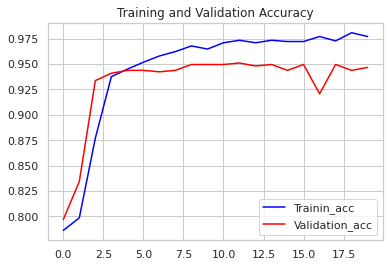

In [63]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

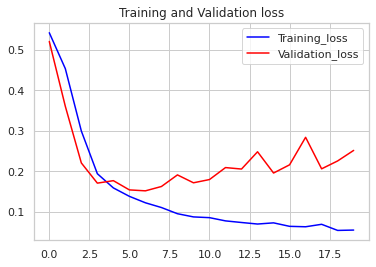

In [64]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [65]:
scores_lstm_dropout = model_2.predict(X_test, verbose=1, batch_size=1024)

1/1 [==============================] - 1s 865ms/step


In [66]:
y_pred_lstm_dropout=np.where(scores_lstm_dropout>0.5,1,0)

In [67]:
acc_dropout = accuracy_score(y_pred_lstm_dropout,Y_test)
print(acc_dropout)

0.946685878962536


By adding dropout rate our model val_loss also decreasing with training loss compare to without dropout rate LSTM network. So by adding Dropout rate our model have less chances to overfit.

**Bidirectional LSTM:**
Using bidirectional will run our inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

Bi-LSTM model need Embedding layer and Dense layer for training

Embedding layer Turns positive integers (indexes) into dense vectors of fixed size.

Our problem statement belong to binary classification so we need to use sigmoid activation in dense layer.

In Bi-LSTM cell no of neurons is hyperparameter , we take 100 neurons.

We need to specify the embedding vector output , we take embedding vector output size = 40 , it is also a hyperparameter.

We add Dropout layer with 0.65 Dropout rate.

Optimizer = adam, metric = accuracy.

In [68]:
from tensorflow.keras.layers import Bidirectional
embedding_vector_features=40
model_3=Sequential()
model_3.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_3.add(Dropout(0.65))
model_3.add(Bidirectional(LSTM(100)))
model_3.add(Dropout(0.65))
model_3.add(Dense(1,activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 40)           83440     
                                                                 
 dropout_2 (Dropout)         (None, 100, 40)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 196,441
Trainable params: 196,441
Non-trainable params: 0
________________________________________________

In [69]:
history_3=model_3.fit(X_train, Y_train,batch_size=32,epochs=20,validation_data=(X_test, Y_test),)

Epoch 1/20
51/51 [==============================] - 13s 178ms/step - loss: 0.5291 - accuracy: 0.7911 - val_loss: 0.5030 - val_accuracy: 0.7968
Epoch 2/20
51/51 [==============================] - 8s 153ms/step - loss: 0.4854 - accuracy: 0.7973 - val_loss: 0.4230 - val_accuracy: 0.7968
Epoch 3/20
51/51 [==============================] - 8s 155ms/step - loss: 0.3635 - accuracy: 0.8115 - val_loss: 0.2651 - val_accuracy: 0.8631
Epoch 4/20
51/51 [==============================] - 8s 151ms/step - loss: 0.2399 - accuracy: 0.9061 - val_loss: 0.2364 - val_accuracy: 0.9294
Epoch 5/20
51/51 [==============================] - 8s 152ms/step - loss: 0.1948 - accuracy: 0.9388 - val_loss: 0.1867 - val_accuracy: 0.9409
Epoch 6/20
51/51 [==============================] - 10s 192ms/step - loss: 0.1567 - accuracy: 0.9524 - val_loss: 0.1563 - val_accuracy: 0.9395
Epoch 7/20
51/51 [==============================] - 11s 220ms/step - loss: 0.1455 - accuracy: 0.9481 - val_loss: 0.1693 - val_accuracy: 0.9424
Epo

In [70]:
acc_bi = history_3.history['accuracy']
val_acc_bi = history_3.history['val_accuracy']
loss_bi = history_3.history['loss']
val_loss_bi = history_3.history['val_loss']
epochs=range(len(acc_bi))

Text(0.5, 1.0, 'Training and Validation Accuracy')

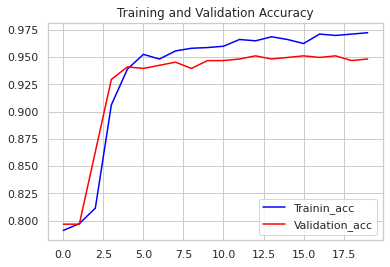

In [71]:
plt.plot(epochs,acc_bi,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc_bi,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

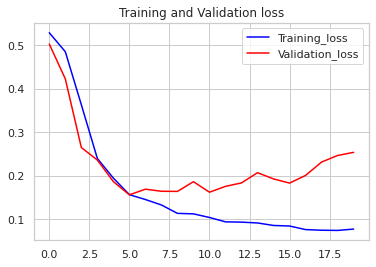

In [72]:
plt.plot(epochs,loss_bi,label='Training_loss',color='blue')
plt.plot(epochs,val_loss_bi,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

**Model Evaluation**

In [73]:
scores = model_3.predict(X_test, verbose=1, batch_size=1024)

1/1 [==============================] - 2s 2s/step


In [74]:
y_pred=np.where(scores>0.5,1,0)

In [75]:
cm=confusion_matrix(y_pred,Y_test)
print(cm)

[[124  19]
 [ 17 534]]


In [76]:
acc_bilstm = accuracy_score(y_pred,Y_test)
print(acc_bilstm)

0.9481268011527377


In [77]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       141
           1       0.97      0.97      0.97       553

    accuracy                           0.95       694
   macro avg       0.92      0.92      0.92       694
weighted avg       0.95      0.95      0.95       694



**Test Case**

In [85]:
string2= 'worst food ever'

# Converting above text into vectors using tokenizer
x_1=tokenizer.texts_to_sequences([string2])

# Padding above converted vectores
x_1 = pad_sequences(x_1,maxlen=100)

# evaluating trained model on new data
res = model_3.predict(x_1)

1/1 [==============================] - 0s 50ms/step


In [86]:
if(res[0][0] > 0.6):
  print("Negative Reviews!")
else:
  print("Positive Reviews!")

Negative Reviews!


**Model Accuracy Comparison**

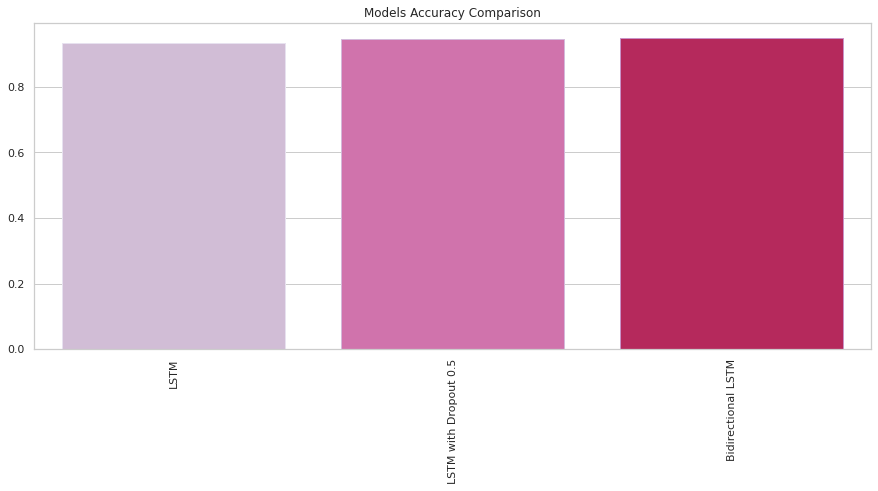

In [87]:
LSTM_Name = ['LSTM', 'LSTM with Dropout 0.5', 'Bidirectional LSTM']
LSTM_Test_Accuracy = [acc_lstm, acc_dropout, acc_bilstm]
plt.subplots(figsize=(15,6))
sns.barplot(x=LSTM_Name, y=LSTM_Test_Accuracy,palette='PuRd',edgecolor=sns.color_palette('PuRd',7))
plt.xticks(rotation=90)
plt.title('Models Accuracy Comparison')
plt.show()

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>92.5%</td>
  </tr>
    <td>Support Vector Machine</td>
    <td>92.9%</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>88.4%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>88.4%</td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td>93.5%</td>
  </tr>
  <tr>
    <td>LSTM with Dropout 0.5</td>
    <td>94.6%</td>
  </tr>
  <tr>
    <td>Bidrectional LSTM</td>
    <td>94.8%</td>
  </tr>
</table>

From here, we can conclude that **LSTM with Dropout 0.5** and **Bidirectional LSTM** gives the maximum accuracy.